In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## 观察数据集

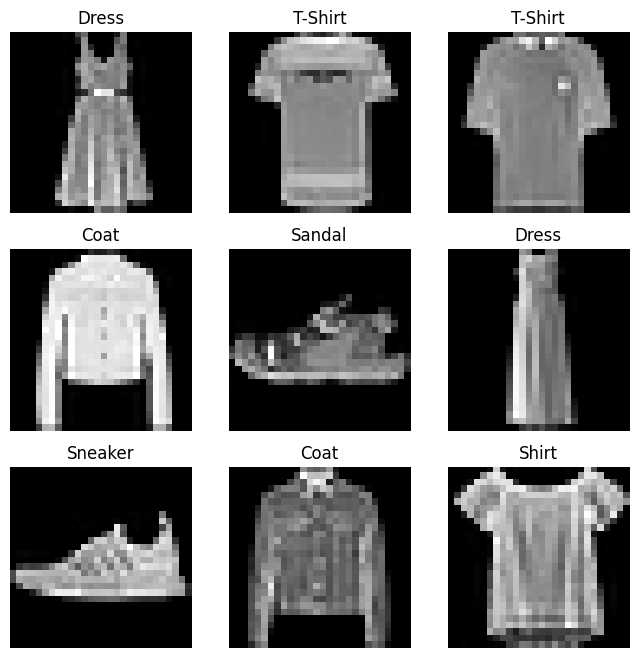

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [4]:
train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)

In [5]:
model = torch.nn.Sequential(torch.nn.Flatten(), torch.nn.Linear(784, 10)) # 784 = 28 * 28
def init_weights(m):
    if type(m) == torch.nn.Linear:
        print(m.weight)
        torch.nn.init.normal_(m.weight, std=0.01)
        print(m.weight)
model.apply(init_weights)

Parameter containing:
tensor([[ 0.0129,  0.0164,  0.0107,  ..., -0.0097,  0.0126,  0.0206],
        [ 0.0324, -0.0336, -0.0331,  ..., -0.0333, -0.0192,  0.0339],
        [ 0.0110,  0.0248, -0.0114,  ...,  0.0345, -0.0238, -0.0011],
        ...,
        [ 0.0024, -0.0314,  0.0058,  ..., -0.0093,  0.0345,  0.0148],
        [ 0.0329, -0.0247, -0.0269,  ..., -0.0111,  0.0171, -0.0323],
        [ 0.0068,  0.0258, -0.0119,  ..., -0.0200,  0.0017, -0.0335]],
       requires_grad=True)
Parameter containing:
tensor([[ 1.5331e-02,  1.0038e-02, -3.9623e-04,  ...,  2.6146e-03,
          7.0726e-03,  4.0144e-03],
        [ 6.5896e-03,  5.7021e-04, -4.1224e-04,  ...,  1.0636e-02,
         -6.5817e-03,  1.7188e-03],
        [ 2.6862e-02,  6.0722e-03, -9.7089e-03,  ..., -5.2689e-03,
         -1.2600e-02, -8.4380e-03],
        ...,
        [-1.4893e-02, -1.0391e-02,  4.0207e-03,  ...,  1.4688e-02,
          2.0049e-05, -2.5913e-03],
        [-1.0333e-02,  4.4270e-03,  1.3998e-02,  ...,  9.2156e-03,
   

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [6]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")
model.to(device)

Running on the GPU


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [7]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss.to(device)

CrossEntropyLoss()

In [8]:
history = []
for epoch in range(20):
    l = None
    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)
        l = loss(model(x), y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        print(f"\r epoch {epoch} loss = {l}", end='')
    history.append(l.cpu().detach().numpy())
    print("")

 epoch 0 loss = 0.8160599470138557
 epoch 1 loss = 0.51131790876388554
 epoch 2 loss = 0.64945507049560556
 epoch 3 loss = 0.58712118864059456
 epoch 4 loss = 0.48335915803909345
 epoch 5 loss = 0.31436184048652657
 epoch 6 loss = 0.66881406307220464
 epoch 7 loss = 0.60791140794754034
 epoch 8 loss = 0.47946164011955265
 epoch 9 loss = 0.57290542125701964
 epoch 10 loss = 0.53795111179351817
 epoch 11 loss = 0.44454011321067817
 epoch 12 loss = 0.35404029488563545
 epoch 13 loss = 0.47124350070953373
 epoch 14 loss = 0.31225138902664185
 epoch 15 loss = 0.62433189153671263
 epoch 16 loss = 0.45028519630432134
 epoch 17 loss = 0.42535245418548584
 epoch 18 loss = 0.52611976861953746
 epoch 19 loss = 0.51898360252380374


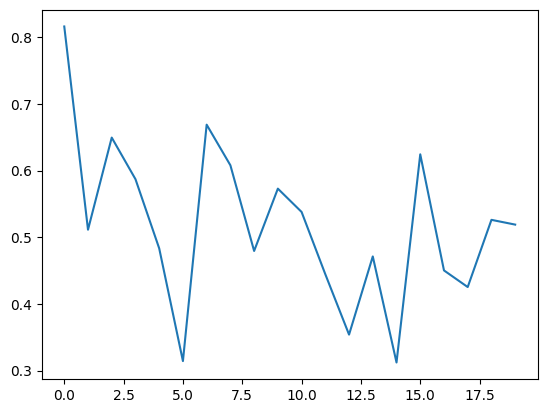

In [9]:
plt.plot(np.arange(len(history)), history)
plt.show()

In [10]:
Y_hat = model(torch.tensor(training_data.data, dtype=torch.float32).cuda()).cpu()
result = torch.argmax(Y_hat, 1)
result

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17076\1048955512.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_hat = model(torch.tensor(training_data.data, dtype=torch.float32).cuda()).cpu()


tensor([9, 0, 3,  ..., 3, 0, 5])

In [11]:
accuracy = np.sum(np.where(result == training_data.targets, 1, 0)) / result.shape[0]
training_data.targets, accuracy

(tensor([9, 0, 0,  ..., 3, 0, 5]), 0.8095833333333333)

In [12]:
test_yhat = model(torch.tensor(test_data.data, dtype=torch.float32).cuda()).cpu()
result = torch.argmax(test_yhat, 1)
result

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17076\1161819617.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_yhat = model(torch.tensor(test_data.data, dtype=torch.float32).cuda()).cpu()


tensor([9, 2, 1,  ..., 8, 1, 7])

In [13]:
test_accuracy = np.sum(np.where(result == test_data.targets, 1, 0)) / result.shape[0]
test_accuracy

0.7984